<a href="https://colab.research.google.com/github/ErikaRochadeAraujo/AnaliseRiscoCredito/blob/main/AnaliseRiscoCredito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/ErikaRochadeAraujo/AnaliseRiscoCredito/main/credit_risk.csv')

- Age (numeric)
- Sex (text: male, female)
- Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
- Housing (text: own, rent, or free)
- Saving accounts (text - little, moderate, quite rich, rich)
- Checking account (numeric, in DM - Deutsch Mark)
- Credit amount (numeric, in DM)
- Duration (numeric, in month)
- Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

Deutsche Mark

In [4]:
df.columns

Index(['default', 'conta_corrente', 'prazo_emprestimo_meses',
       'historico_credito', 'proposito_emprestimo', 'valor_emprestimo',
       'reserva_cc', 'tempo_emprego_atual', 'taxa_comp_salario',
       'sexo_est_civil', 'outros_fiadores', 'anos_residencia_atual',
       'propriedade', 'idade', 'outros_planos_financiamento',
       'tipo_residencia', 'n_creditos_banco', 'status_emprego',
       'n_dependentes', 'telefone', 'trabalhador_estrangeiro'],
      dtype='object')

In [5]:
df.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   default                      1000 non-null   int64 
 1   conta_corrente               1000 non-null   object
 2   prazo_emprestimo_meses       1000 non-null   int64 
 3   historico_credito            1000 non-null   object
 4   proposito_emprestimo         1000 non-null   object
 5   valor_emprestimo             1000 non-null   int64 
 6   reserva_cc                   1000 non-null   object
 7   tempo_emprego_atual          1000 non-null   object
 8   taxa_comp_salario            1000 non-null   int64 
 9   sexo_est_civil               1000 non-null   object
 10  outros_fiadores              1000 non-null   object
 11  anos_residencia_atual        1000 non-null   int64 
 12  propriedade                  1000 non-null   object
 13  idade                        1000 

In [8]:
df.columns

Index(['default', 'conta_corrente', 'prazo_emprestimo_meses',
       'historico_credito', 'proposito_emprestimo', 'valor_emprestimo',
       'reserva_cc', 'tempo_emprego_atual', 'taxa_comp_salario',
       'sexo_est_civil', 'outros_fiadores', 'anos_residencia_atual',
       'propriedade', 'idade', 'outros_planos_financiamento',
       'tipo_residencia', 'n_creditos_banco', 'status_emprego',
       'n_dependentes', 'telefone', 'trabalhador_estrangeiro'],
      dtype='object')

In [10]:
cred = df[['default','prazo_emprestimo_meses', 'valor_emprestimo', 'taxa_comp_salario', 'anos_residencia_atual','idade', 'n_creditos_banco', 'n_dependentes']]

In [15]:
df['conta_corrente'].value_counts().unique

<bound method Series.unique of no checking account                                   394
< 0 DM                                                274
0 <= ... < 200 DM                                     269
>= 200 DM / salary assignments for at least 1 year     63
Name: conta_corrente, dtype: int64>

In [17]:
cred = pd.get_dummies(df, columns=['conta_corrente'])

In [19]:
cred.head(3)

,default,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,...,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,conta_corrente_0 <= ... < 200 DM,conta_corrente_< 0 DM,conta_corrente_>= 200 DM / salary assignments for at least 1 year,conta_corrente_no checking account
0,0,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,...,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,0,1,0,0
1,1,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,...,own,1,skilled employee / official,1,none,yes,1,0,0,0
2,0,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,...,own,1,unskilled - resident,2,none,yes,0,0,0,1


In [23]:
cred = pd.get_dummies(df, columns=['conta_corrente', 'historico_credito', 'proposito_emprestimo', 'reserva_cc', 'tempo_emprego_atual', 'sexo_est_civil', 'outros_fiadores', 'propriedade', 'outros_planos_financiamento', 'tipo_residencia', 'status_emprego', 'telefone', 'trabalhador_estrangeiro'])

In [24]:
cred.head(3)

,default,prazo_emprestimo_meses,valor_emprestimo,taxa_comp_salario,anos_residencia_atual,idade,n_creditos_banco,n_dependentes,conta_corrente_0 <= ... < 200 DM,conta_corrente_< 0 DM,...,tipo_residencia_own,tipo_residencia_rent,status_emprego_management/ self-employed/ highly qualified employee/ officer,status_emprego_skilled employee / official,status_emprego_unemployed/ unskilled - non-resident,status_emprego_unskilled - resident,telefone_none,"telefone_yes, registered under the customers name",trabalhador_estrangeiro_no,trabalhador_estrangeiro_yes
0,0,6,1169,4,4,67,2,1,0,1,...,1,0,0,1,0,0,0,1,0,1
1,1,48,5951,2,2,22,1,1,1,0,...,1,0,0,1,0,0,1,0,0,1
2,0,12,2096,2,3,49,1,2,0,0,...,1,0,0,0,0,1,1,0,0,1


In [25]:
cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
 #   Column                                                                         Non-Null Count  Dtype
---  ------                                                                         --------------  -----
 0   default                                                                        1000 non-null   int64
 1   prazo_emprestimo_meses                                                         1000 non-null   int64
 2   valor_emprestimo                                                               1000 non-null   int64
 3   taxa_comp_salario                                                              1000 non-null   int64
 4   anos_residencia_atual                                                          1000 non-null   int64
 5   idade                                                                          1000 non-null   int64
 6   n_creditos_banco                         

# Criando funções para aplicar a Classificação dos dados 

In [26]:
X = cred.drop(columns=['default'])
Y = cred['default']

In [27]:
def standardscaler(X, Y, TS, RS):
  x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=TS, random_state=RS, stratify=Y)
  return (x_train, x_test, y_train, y_test)

def logisticreg(miter, pena, x_train, y_train, x_test):
  logistic = LogisticRegression(max_iter=miter, penalty= pena)
  logistic.fit(x_train, y_train)
  yhat = logistic.predict(x_test)
  yhat_prob = logistic.predict_proba(x_test)[:,1]
  return (yhat, yhat_prob, logistic)


def mconfusao(y_test, yhat):
  cf_mx = pd.DataFrame(metrics.confusion_matrix(y_test, yhat))
  sns.heatmap(cf_mx, annot=True, fmt='g')
  plt.title('Matriz de Confusão')
  plt.ylabel('R E A L')
  plt.xlabel('P R E V I S T O')
  plt.show()


 #A função retorna as taxas de falsos positivos para cada limite, taxas de verdadeiros positivos para cada limite e limites

def fp_vp(y_test, yhat_prob):
  fpr, tpr, thresholds = roc_curve(y_test, yhat_prob)
  plt.plot([0,1], [0,1], 'k--')
  plt.plot(fpr, tpr)
  plt.xlabel('fpr')
  plt.ylabel('tpr')
  plt.show()


def metricas(y_test, yhat_prob, yhat):
  rauc = roc_auc_score(y_test, yhat_prob)  * 100
  print('Acurácia de falsos positivos e verdadeiros positivos: ', rauc)
  auc = metrics.accuracy_score(y_test, yhat) * 100
  print('Acurácia: ', auc)
  print(metrics.classification_report(y_test, yhat))

def classificar(X, Y):
  x_train, x_test, y_train, y_test = standardscaler(X, Y, 0.3, 42)
  yhat, yhat_prob, logistic = logisticreg(1000, 'l2', x_train, y_train, x_test)
  mconfusao(y_test, yhat)
  fp_vp(y_test, yhat_prob)
  metricas(y_test, yhat_prob, yhat)






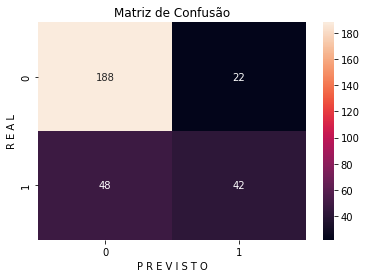

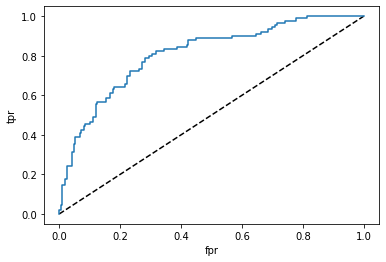

Acurácia de falsos positivos e verdadeiros positivos:  80.8042328042328
Acurácia:  76.66666666666667
              precision    recall  f1-score   support

           0       0.80      0.90      0.84       210
           1       0.66      0.47      0.55        90

    accuracy                           0.77       300
   macro avg       0.73      0.68      0.69       300
weighted avg       0.75      0.77      0.75       300



In [30]:
classificar(X, Y)

# aqui ainda estou escrevendo

In [ ]:
cv_fold = StratifiedKFold(n_splits=10)
cv_logistic = cross_val_score(logistic, x_train, y_train, cv=cv_fold, scoring='accuracy')
cv_logistic.mean()

In [ ]:
acc = metrics.accuracy_score(y_test, yhat) * 100
acc_cv = cv_logistic.mean()
print(f'A acurácia do modelo é {acc} e a acurácia cross validada é {acc_cv}')

In [ ]:
params = {
    'max_iter': [50, 100, 500],
    'penalty': ['l1', 'l2']
}
logistic = LogisticRegression()
logict_cv = GridSearchCV(logistic, params, cv=10)
logict_cv.fit(x_train, y_train)

In [ ]:
logict_cv.best_score_


In [ ]:
logict_cv.best_params_

In [ ]:
yhat = logict_cv.predict(x_test)